# Problem Statement

The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017.

- Dataset contains the following columns:
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
    - District: Indicates the police district where the incident occurred.
    - Ward: The ward (City Council district) where the incident occurred.
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

--> Predict the crime rate using Facebook prophet tool.

In [ ]:
!pip install prophet

# Import the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from prophet import Prophet

In [43]:
data_1 = pd.read_csv("/content/Chicago_Crimes_2001_to_2004.csv")
data_2 = pd.read_csv("/content/Chicago_Crimes_2005_to_2007.csv")
data_3 = pd.read_csv("/content/Chicago_Crimes_2005_to_2007.csv")
data_4 = pd.read_csv("/content/Chicago_Crimes_2012_to_2017.csv")

<ipython-input-43-2b8dc77acf0f>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv("/content/Chicago_Crimes_2001_to_2004.csv")
<ipython-input-43-2b8dc77acf0f>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2 = pd.read_csv("/content/Chicago_Crimes_2005_to_2007.csv")
<ipython-input-43-2b8dc77acf0f>:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3 = pd.read_csv("/content/Chicago_Crimes_2005_to_2007.csv")
<ipython-input-43-2b8dc77acf0f>:4: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4 = pd.read_csv("/content/Chicago_Crimes_2012_to_2017.csv")


In [44]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45209 entries, 0 to 45208
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45209 non-null  int64  
 1   ID                    45209 non-null  int64  
 2   Case Number           45209 non-null  object 
 3   Date                  45209 non-null  object 
 4   Block                 45208 non-null  object 
 5   IUCR                  45208 non-null  object 
 6   Primary Type          45208 non-null  object 
 7   Description           45208 non-null  object 
 8   Location Description  45208 non-null  object 
 9   Arrest                45208 non-null  object 
 10  Domestic              45208 non-null  object 
 11  Beat                  45208 non-null  float64
 12  District              45208 non-null  float64
 13  Ward                  3843 non-null   float64
 14  Community Area        3838 non-null   float64
 15  FBI Code           

In [45]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41903 entries, 0 to 41902
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            41903 non-null  int64  
 1   ID                    41903 non-null  int64  
 2   Case Number           41903 non-null  object 
 3   Date                  41903 non-null  object 
 4   Block                 41903 non-null  object 
 5   IUCR                  41902 non-null  object 
 6   Primary Type          41902 non-null  object 
 7   Description           41902 non-null  object 
 8   Location Description  41902 non-null  object 
 9   Arrest                41902 non-null  object 
 10  Domestic              41902 non-null  object 
 11  Beat                  41902 non-null  float64
 12  District              41902 non-null  float64
 13  Ward                  41902 non-null  float64
 14  Community Area        41900 non-null  float64
 15  FBI Code           

In [46]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41903 entries, 0 to 41902
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            41903 non-null  int64  
 1   ID                    41903 non-null  int64  
 2   Case Number           41903 non-null  object 
 3   Date                  41903 non-null  object 
 4   Block                 41903 non-null  object 
 5   IUCR                  41902 non-null  object 
 6   Primary Type          41902 non-null  object 
 7   Description           41902 non-null  object 
 8   Location Description  41902 non-null  object 
 9   Arrest                41902 non-null  object 
 10  Domestic              41902 non-null  object 
 11  Beat                  41902 non-null  float64
 12  District              41902 non-null  float64
 13  Ward                  41902 non-null  float64
 14  Community Area        41900 non-null  float64
 15  FBI Code           

In [47]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47356 entries, 0 to 47355
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            47356 non-null  int64  
 1   ID                    47356 non-null  int64  
 2   Case Number           47356 non-null  object 
 3   Date                  47356 non-null  object 
 4   Block                 47355 non-null  object 
 5   IUCR                  47355 non-null  object 
 6   Primary Type          47355 non-null  object 
 7   Description           47355 non-null  object 
 8   Location Description  47275 non-null  object 
 9   Arrest                47355 non-null  object 
 10  Domestic              47355 non-null  object 
 11  Beat                  47355 non-null  float64
 12  District              47355 non-null  float64
 13  Ward                  47354 non-null  float64
 14  Community Area        47340 non-null  float64
 15  FBI Code           

In [48]:
chicago_data=pd.concat([data_1,data_2,data_3,data_4])
chicago_data

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47351,855755,9947170,HY135532,01/31/2015 02:00:00 AM,016XX W 18TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,...,25.0,31.0,05,1165632.0,1891466.0,2015.0,08/17/2015 03:03:40 PM,41.857773,-87.667511,"(41.857773474, -87.667510615)"
47352,855756,9947172,HY135412,01/31/2015 12:00:00 PM,003XX S HALSTED ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,27.0,28.0,08B,1171096.0,1898777.0,2015.0,08/17/2015 03:03:40 PM,41.877717,-87.647240,"(41.877717381, -87.647240079)"
47353,855757,9947173,HY135452,01/31/2015 09:30:00 AM,010XX E 80TH ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,8.0,44.0,05,1184388.0,1852167.0,2015.0,08/17/2015 03:03:40 PM,41.749514,-87.599897,"(41.749514242, -87.599896609)"
47354,855758,9947174,HY135590,01/31/2015 04:35:00 PM,036XX W SHAKESPEARE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,...,26.0,22.0,08B,1151683.0,1914044.0,2015.0,08/17/2015 03:03:40 PM,41.920015,-87.718118,"(41.920015253, -87.718117891)"


In [49]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176371 entries, 0 to 47355
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            176371 non-null  int64  
 1   ID                    176371 non-null  int64  
 2   Case Number           176371 non-null  object 
 3   Date                  176371 non-null  object 
 4   Block                 176369 non-null  object 
 5   IUCR                  176367 non-null  object 
 6   Primary Type          176367 non-null  object 
 7   Description           176367 non-null  object 
 8   Location Description  176287 non-null  object 
 9   Arrest                176367 non-null  object 
 10  Domestic              176367 non-null  object 
 11  Beat                  176367 non-null  float64
 12  District              176367 non-null  float64
 13  Ward                  135001 non-null  float64
 14  Community Area        134978 non-null  float64
 15  FBI Co

In [50]:
chicago_data.shape

(176371, 23)

In [ ]:
chicago_data.describe()

In [51]:
chicago_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [52]:
chicago_data.isnull().sum()

,0
Unnamed: 0,0
ID,0
Case Number,0
Date,0
Block,2
IUCR,4
Primary Type,4
Description,4
Location Description,84
Arrest,4


In [53]:
chicago_data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [54]:
chicago_data=chicago_data.drop(['Unnamed: 0','ID', 'Case Number','IUCR',
                   'X Coordinate', 'Y Coordinate','Updated On',
                   'Year','FBI Code','Beat','Ward',
                   'Community Area','Location','Latitude',
                    'Longitude','District'],axis=1)

In [56]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [57]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176371 entries, 0 to 47355
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Date                  176371 non-null  object
 1   Block                 176369 non-null  object
 2   Primary Type          176367 non-null  object
 3   Description           176367 non-null  object
 4   Location Description  176287 non-null  object
 5   Arrest                176367 non-null  object
 6   Domestic              176367 non-null  object
dtypes: object(7)
memory usage: 10.8+ MB


In [60]:
chicago_data.Date = pd.to_datetime(chicago_data.Date, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [61]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [89]:
chicago_data.index=pd.DatetimeIndex(chicago_data.Date)

In [62]:
chicago_data['Primary Type'].value_counts()

,count
Primary Type,
THEFT,36247
BATTERY,33649
CRIMINAL DAMAGE,20615
NARCOTICS,16710
OTHER OFFENSE,11400
ASSAULT,11290
BURGLARY,8866
MOTOR VEHICLE THEFT,8179
DECEPTIVE PRACTICE,7053


In [65]:
chicago_data['Primary Type'].value_counts().iloc[:15]

,count
Primary Type,
THEFT,36247
BATTERY,33649
CRIMINAL DAMAGE,20615
NARCOTICS,16710
OTHER OFFENSE,11400
ASSAULT,11290
BURGLARY,8866
MOTOR VEHICLE THEFT,8179
DECEPTIVE PRACTICE,7053


In [74]:
order_data=chicago_data['Primary Type'].value_counts().iloc[:15].index
order_data.is_unique

True

In [82]:
chicago_data['Location Description'].value_counts()

,count
Location Description,
STREET,45727
RESIDENCE,32709
APARTMENT,17556
SIDEWALK,14888
OTHER,7159
...,...
GARAGE,1
CHA PLAY LOT,1
HOSPITAL,1


In [85]:
chicago_data['Location Description'].value_counts().iloc[:15]

,count
Location Description,
STREET,45727
RESIDENCE,32709
APARTMENT,17556
SIDEWALK,14888
OTHER,7159
PARKING LOT/GARAGE(NON.RESID.),4903
VEHICLE NON-COMMERCIAL,4121
"SCHOOL, PUBLIC, BUILDING",3918
ALLEY,3477


In [93]:
chicago_data.resample("Y").size()

<ipython-input-93-e0b4341cdc03>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chicago_data.resample("Y").size()


,0
Date,
2001-12-31,38831
2002-12-31,4191
2003-12-31,979
2004-12-31,1207
2005-12-31,1458
2006-12-31,82348
2007-12-31,0
2008-12-31,0
2009-12-31,0


<ipython-input-96-0eab38c0a6e1>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_data.resample("Y").size())


Text(0, 0.5, 'Numer of Crimes')

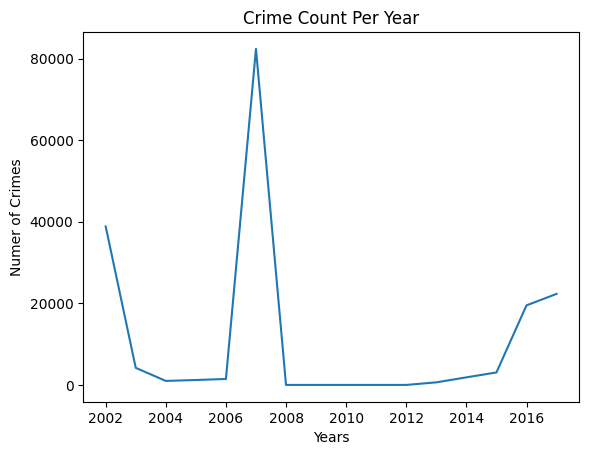

In [96]:
plt.plot(chicago_data.resample("Y").size())
plt.title("Crime Count Per Year")
plt.xlabel("Years")
plt.ylabel("Numer of Crimes")

#Prepare the Data

In [101]:
chicago_data_prophet= chicago_data.resample("M").size().reset_index()
chicago_data_prophet

<ipython-input-101-464d6bec1bec>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_data_prophet= chicago_data.resample("M").size().reset_index()


,Date,0
0,2001-01-31,34935
1,2001-02-28,3006
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
180,2016-01-31,81
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [102]:
chicago_data_prophet.columns=['Date','Crime Count']
chicago_data_prophet

,Date,Crime Count
0,2001-01-31,34935
1,2001-02-28,3006
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
180,2016-01-31,81
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


In [104]:
chicago_data_prophet_final=chicago_data_prophet.rename(columns={'Date':'ds',"Crime Count":"y"})
chicago_data_prophet_final

,ds,y
0,2001-01-31,34935
1,2001-02-28,3006
2,2001-03-31,59
3,2001-04-30,89
4,2001-05-31,62
...,...,...
180,2016-01-31,81
181,2016-02-29,123
182,2016-03-31,213
183,2016-04-30,1663


# Make Predictions

In [105]:
m = Prophet()
m.fit(chicago_data_prophet_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoiayv66e/_xhvio8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoiayv66e/aundjaiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8194', 'data', 'file=/tmp/tmpoiayv66e/_xhvio8c.json', 'init=/tmp/tmpoiayv66e/aundjaiq.json', 'output', 'file=/tmp/tmpoiayv66e/prophet_modeltxz9vb6h/prophet_model-20241228231920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
future = m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,912.160485,-1853.341011,10601.023774,912.160485,912.160485,3729.739056,3729.739056,3729.739056,3729.739056,3729.739056,3729.739056,0.0,0.0,0.0,4641.899541
1,2001-02-28,908.871972,-5587.695839,7228.666043,908.871972,908.871972,-174.782461,-174.782461,-174.782461,-174.782461,-174.782461,-174.782461,0.0,0.0,0.0,734.089511
2,2001-03-31,905.231118,-5611.267653,7208.314540,905.231118,905.231118,-104.674905,-104.674905,-104.674905,-104.674905,-104.674905,-104.674905,0.0,0.0,0.0,800.556213
3,2001-04-30,901.707712,-2948.016664,10333.929703,901.707712,901.707712,2675.286659,2675.286659,2675.286659,2675.286659,2675.286659,2675.286659,0.0,0.0,0.0,3576.994371
4,2001-05-31,898.066858,-3591.955850,9526.261114,898.066858,898.066858,2043.315418,2043.315418,2043.315418,2043.315418,2043.315418,2043.315418,0.0,0.0,0.0,2941.382276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2017-05-27,212.333925,-11218.262330,1729.466185,212.332956,212.334979,-5361.889265,-5361.889265,-5361.889265,-5361.889265,-5361.889265,-5361.889265,0.0,0.0,0.0,-5149.555339
546,2017-05-28,212.216545,-9871.761779,2713.475130,212.215574,212.217601,-3394.973286,-3394.973286,-3394.973286,-3394.973286,-3394.973286,-3394.973286,0.0,0.0,0.0,-3182.756741
547,2017-05-29,212.099164,-7650.409757,5106.968966,212.098190,212.100224,-1483.230342,-1483.230342,-1483.230342,-1483.230342,-1483.230342,-1483.230342,0.0,0.0,0.0,-1271.131178
548,2017-05-30,211.981784,-6004.529950,6228.708487,211.980802,211.982848,339.733588,339.733588,339.733588,339.733588,339.733588,339.733588,0.0,0.0,0.0,551.715372


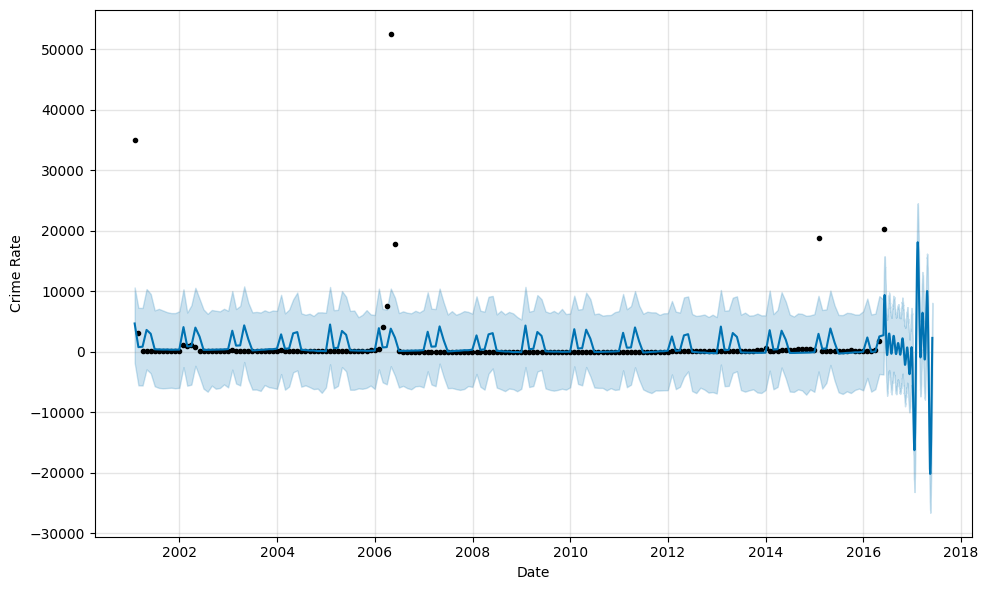

In [110]:
figure=m.plot(forecast,xlabel="Date",ylabel="Crime Rate")

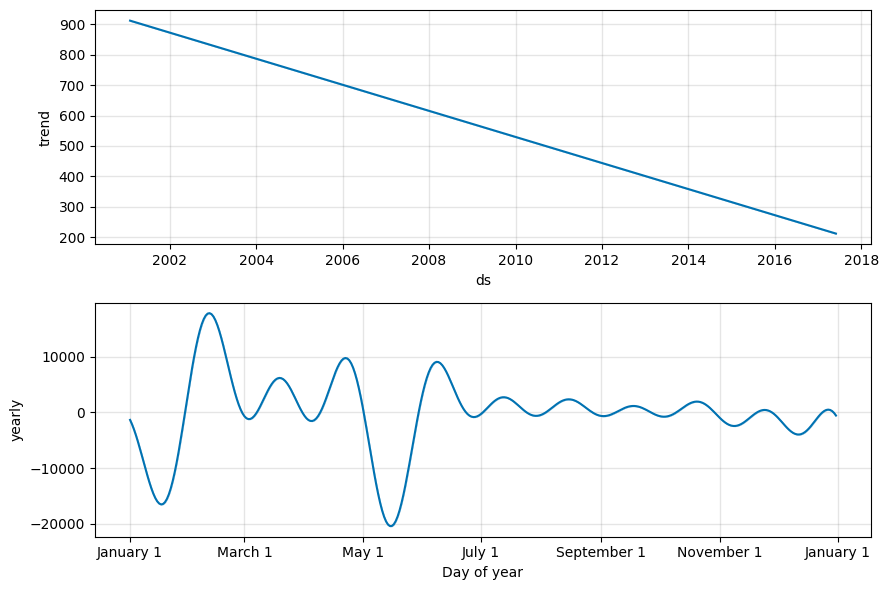

In [111]:
figure=m.plot_components(forecast)

In [115]:
future = m.make_future_dataframe(periods=720)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,912.160485,-2044.714545,10721.267735,912.160485,912.160485,3729.739056,3729.739056,3729.739056,3729.739056,3729.739056,3729.739056,0.0,0.0,0.0,4641.899541
1,2001-02-28,908.871972,-6109.350329,7338.436197,908.871972,908.871972,-174.782461,-174.782461,-174.782461,-174.782461,-174.782461,-174.782461,0.0,0.0,0.0,734.089511
2,2001-03-31,905.231118,-5525.267770,6616.559447,905.231118,905.231118,-104.674905,-104.674905,-104.674905,-104.674905,-104.674905,-104.674905,0.0,0.0,0.0,800.556213
3,2001-04-30,901.707712,-2695.697516,9688.417154,901.707712,901.707712,2675.286659,2675.286659,2675.286659,2675.286659,2675.286659,2675.286659,0.0,0.0,0.0,3576.994371
4,2001-05-31,898.066858,-2992.281962,9208.214441,898.066858,898.066858,2043.315418,2043.315418,2043.315418,2043.315418,2043.315418,2043.315418,0.0,0.0,0.0,2941.382276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2018-05-17,170.663908,-26796.978740,-13717.198540,170.660489,170.667472,-20221.360516,-20221.360516,-20221.360516,-20221.360516,-20221.360516,-20221.360516,0.0,0.0,0.0,-20050.696608
901,2018-05-18,170.546528,-25535.720722,-13194.378709,170.543104,170.550096,-19706.510949,-19706.510949,-19706.510949,-19706.510949,-19706.510949,-19706.510949,0.0,0.0,0.0,-19535.964421
902,2018-05-19,170.429148,-24899.092029,-12635.165529,170.425719,170.432721,-18920.070887,-18920.070887,-18920.070887,-18920.070887,-18920.070887,-18920.070887,0.0,0.0,0.0,-18749.641740
903,2018-05-20,170.311767,-23682.324345,-11190.053770,170.308333,170.315345,-17879.589821,-17879.589821,-17879.589821,-17879.589821,-17879.589821,-17879.589821,0.0,0.0,0.0,-17709.278054


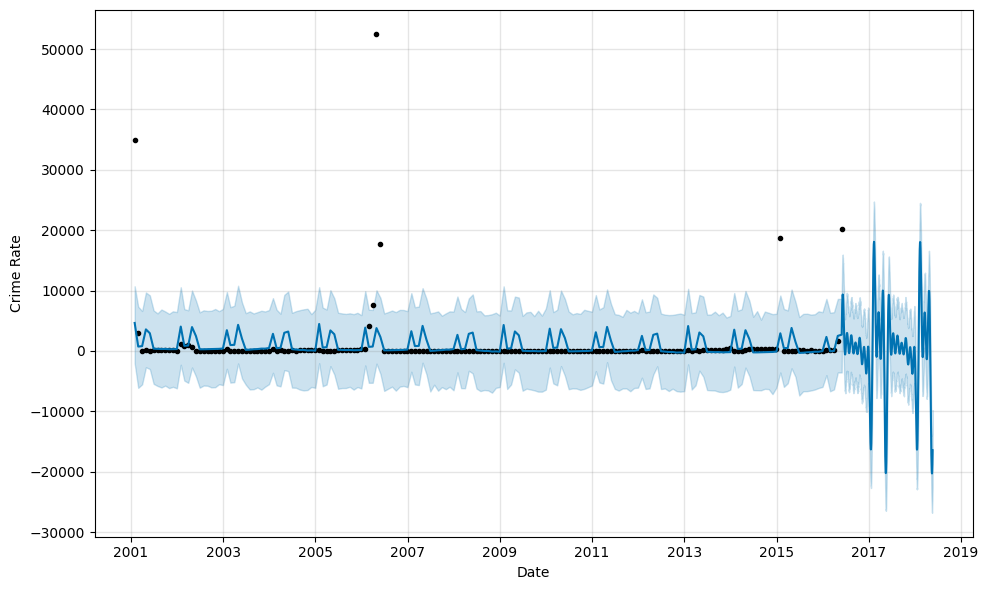

In [116]:
figure=m.plot(forecast,xlabel="Date",ylabel="Crime Rate")

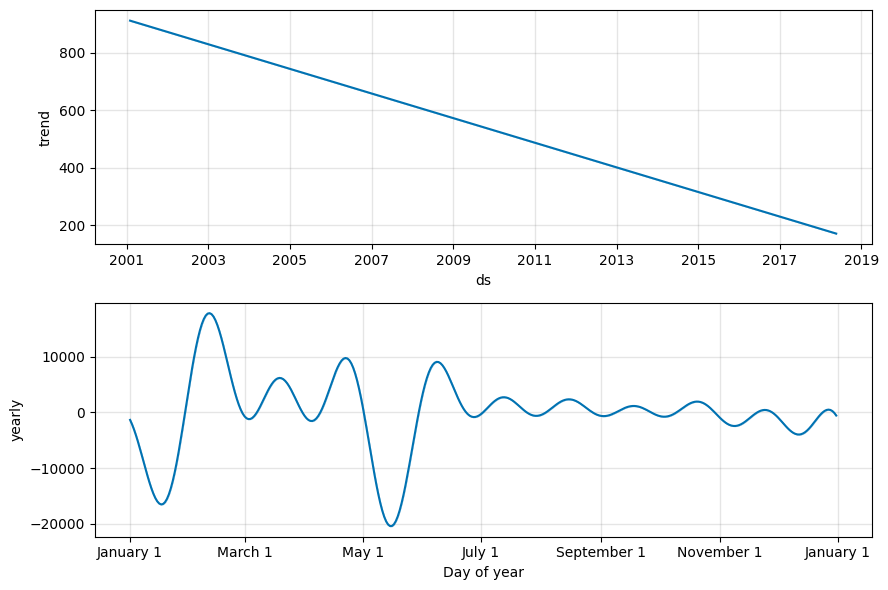

In [117]:
figure=m.plot_components(forecast)